In [155]:
# Imports
from pathlib import Path
import pandas as pd
import tarfile
import requests
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt


In [156]:
def load_housing_data():
  tar_path = Path("datasets/housing.tgz")

  if not tar_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"

    # download .tgz
    response = requests.get(url)
    assert response.status_code == 200, "failed to download the data file"
    with open(tar_path, "wb") as file:
      file.write(response.content)

    # extract .tgz
    with tarfile.open(tar_path) as file:
      file.extractall(Path("datasets"))

  # read as DataFrame
  return pd.read_csv(Path("datasets/housing/housing.csv"));

In [157]:
housing = load_housing_data()
pd.set_option('display.width', 1000)

print(housing[:5])

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity
0    -122.23     37.88                41.0        880.0           129.0       322.0       126.0         8.3252            452600.0        NEAR BAY
1    -122.22     37.86                21.0       7099.0          1106.0      2401.0      1138.0         8.3014            358500.0        NEAR BAY
2    -122.24     37.85                52.0       1467.0           190.0       496.0       177.0         7.2574            352100.0        NEAR BAY
3    -122.25     37.85                52.0       1274.0           235.0       558.0       219.0         5.6431            341300.0        NEAR BAY
4    -122.25     37.85                52.0       1627.0           280.0       565.0       259.0         3.8462            342200.0        NEAR BAY


In [158]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [159]:
print(housing["ocean_proximity"].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [160]:
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  total_bedrooms    population    households  median_income  median_house_value
count  20640.000000  20640.000000        20640.000000  20640.000000    20433.000000  20640.000000  20640.000000   20640.000000        20640.000000
mean    -119.569704     35.631861           28.639486   2635.763081      537.870553   1425.476744    499.539680       3.870671       206855.816909
std        2.003532      2.135952           12.585558   2181.615252      421.385070   1132.462122    382.329753       1.899822       115395.615874
min     -124.350000     32.540000            1.000000      2.000000        1.000000      3.000000      1.000000       0.499900        14999.000000
25%     -121.800000     33.930000           18.000000   1447.750000      296.000000    787.000000    280.000000       2.563400       119600.000000
50%     -118.490000     34.260000           29.000000   2127.000000      435.000000   1166.000000    409.000000       

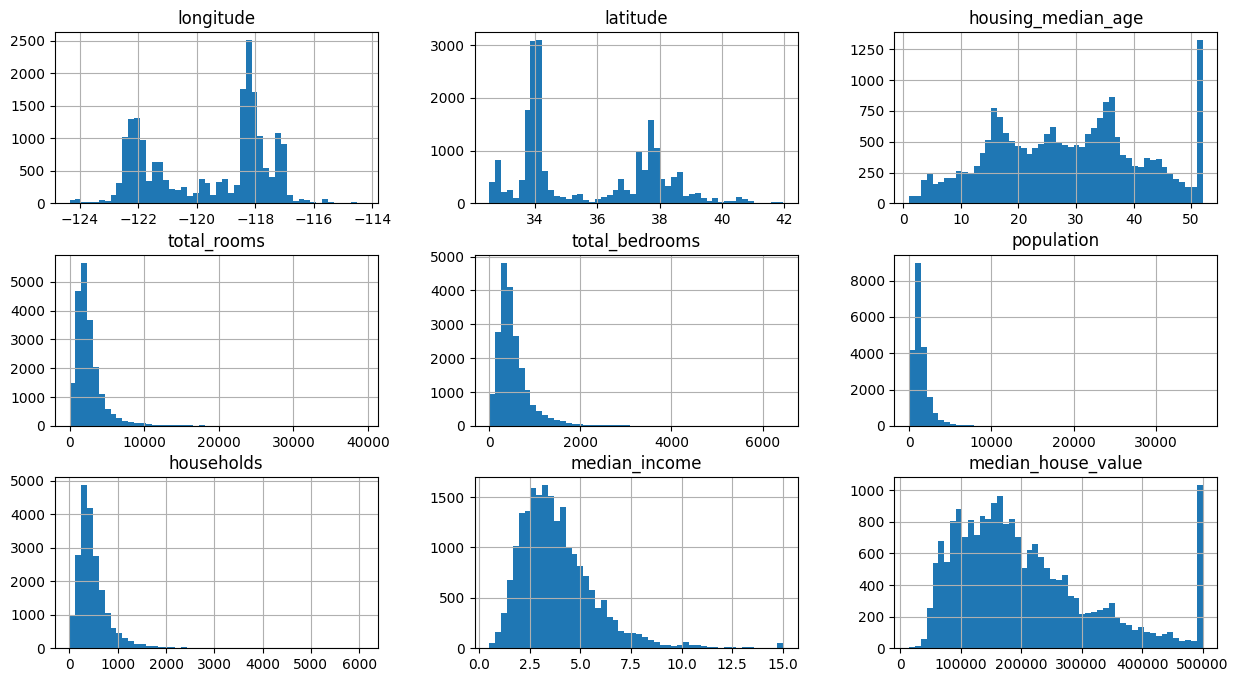

In [161]:
housing.hist(bins=50, figsize=(15, 8))
plt.show()

Total: 20640, Training: 16512, Test: 4128


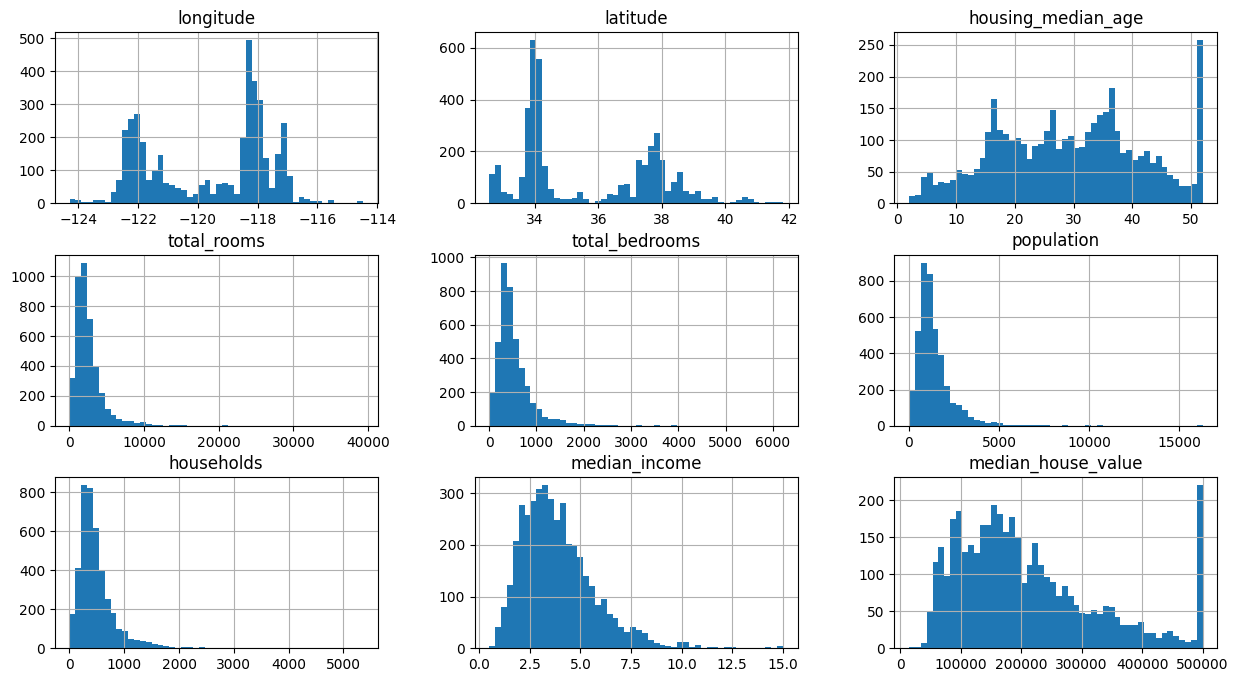

In [162]:
def shuffle_and_split_data(data : pd.DataFrame, test_data_ratio) -> Tuple[pd.DataFrame, pd.DataFrame]:
  np.random.seed(42)
  shuffled_indexes = np.random.permutation(len(data))   # array of shuffled/permuted indexes
  test_size = int(len(data) * test_data_ratio)
  test_indexes = shuffled_indexes[:test_size]
  train_indexes = shuffled_indexes[test_size:]

  return data.iloc[train_indexes], data.iloc[test_indexes]

#train_set, test_set = shuffle_and_split_data(housing, 0.2)


# using sk-learn
from sklearn.model_selection import train_test_split

# random split/sampling
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f"Total: {len(housing)}, Training: {len(train_set)}, Test: {len(test_set)}")
test_set.hist(bins=50, figsize=(15, 8))
plt.show()


In [163]:
# Random Sampling: (see how category proportions has changes)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0, 1.5, 3.0, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f"Population: Income Category Proportion")
print(housing["income_cat"].value_counts() / len(housing))

print(f"Population: Income Category Proportion")
print(test_set["income_cat"].value_counts() / len(test_set))

Population: Income Category Proportion
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64
Population: Income Category Proportion
3    0.345203
2    0.307413
4    0.184109
5    0.120882
1    0.042393
Name: income_cat, dtype: float64


In [164]:
# Stratified Sampling: Since median_income is skewed, we need stratified sampling (see how proportions are almost identical)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])

print(f"Population: Income Category Proportion")
print(housing["income_cat"].value_counts() / len(housing))

print(f"Population: Income Category Proportion")
print(test_set["income_cat"].value_counts() / len(test_set))

Population: Income Category Proportion
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64
Population: Income Category Proportion
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64


In [165]:
# ok, enough income_category, drop it
for set_ in (train_set, test_set):
  set_.drop("income_cat", axis=1, inplace=True)

housing = train_set.copy()

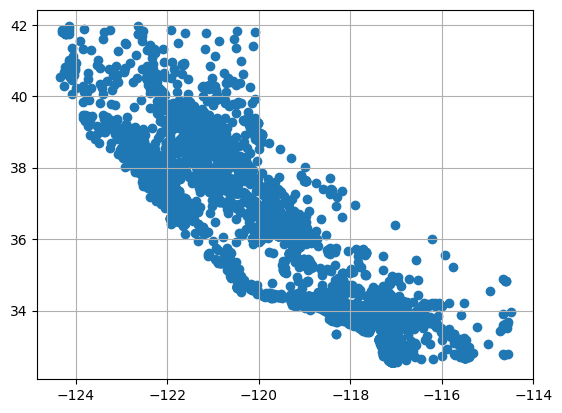

In [166]:
plt.scatter(x=housing["longitude"], y=housing["latitude"])
plt.grid()
plt.show()

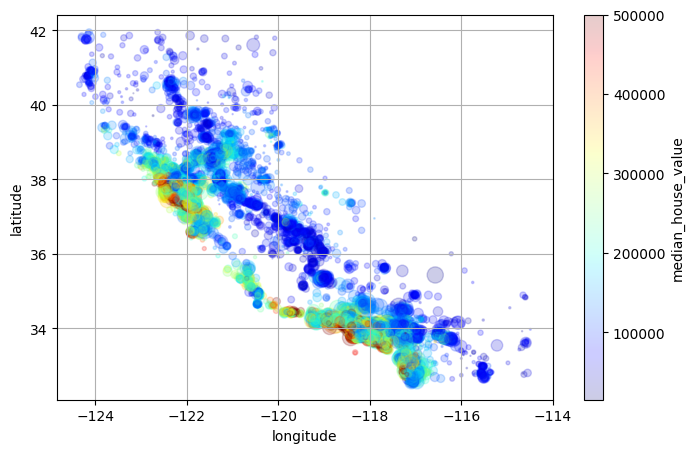

In [167]:
# We couldn't know the dense areas from the prev plot
# Set alpha (opacity) to 0.2 so when multiple points plot on top of each other, it appears darker
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2,
             c="median_house_value", cmap="jet", colorbar=True,
             s=housing["population"] / 50,    # size of points correlates to the density
             legend=True, figsize=(8, 5))
plt.show()

In [168]:
# Correlation
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# Median Income -> has the most influence
# Latitude -> The more you go up, the cheaper houses are.
# Notice: "ocean_proximity" feature is not here, and never will. We got a warning too, only numeric features can have correlation value.

<ipython-input-168-4c4efe768485>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [171]:
# Feature Engineering
housing["_rooms_per_house"]= housing["total_rooms"] / housing["households"]
housing["_bedrooms_ratio"]= housing["total_bedrooms"] / housing["total_rooms"]
housing["_people_per_house"]= housing["population"] / housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


<ipython-input-171-8a7948583c61>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
_rooms_per_house      0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
_people_per_house    -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
_bedrooms_ratio      -0.256397
Name: median_house_value, dtype: float64

In [175]:
# Prep the data
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()
housing.info()

# Notice, total bedrooms has missing values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [192]:
# Replace total_bedrooms missing values with the median of the feature
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# Imputer works on numberic features only, set ocean_proximity aside for now
housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)
X = imputer.transform(housing_num) # handled by sklearn -> returned as 2D array -> convert it to DF
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.info()

# Note: no missing values now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB
